# Segmentarea prin tehnici de clustering. Algoritmii K-means si FCM

## Introducere

Tehnicile de segmentare pe histograma prezentate pana acum se bazeaza implicit pe presupunerea ca nivelul de gri (valoarea pixelului) este o caracteristica suficient de discriminativa pentru separarea tipurilor de obiecte din imagine. 

Dar daca acest lucru nu este valabil? 

Atunci o solutie posibila este ca, pe langa nivelul de gri, sa mai introducem informatie suplimentara pentru fiecare pixel. Dar in acest caz fiecare pixel va fi caracterizat de mai multe numere, numite trasaturi. 

Asadar pentru fiecare pixel vom avea un vector de trasaturi si dorim sa gasim grupurile de pixeli cu vectori de trasaturi similari.

## Algoritmi de clustering

Clustering inseamna gruparea punctelor similare si eventual reprezentarea lor printr-un singur punct numit centroid.

Punerea problemei: Avand un set de pixeli (sau generic date), fiecare dintre ei caracterizat de mai multe trasaturi, dorim gruparea acestora prin conditii de similaritate. Toti pixelii cu vectori de trasaturi ce au valori asemanatoare vor capata o aceeasi eticheta, formand un grup (un cluster). Suplimentar, pentru fiecare grup, este posibila determinarea unui reprezentant tipic care sa aproximeze pixelii din grupul respectiv.
    


## Algoritmul de clusterizare exclusiva K-means (C-means, ISODATA)

Daca consideram ca obiectivul clusterizarii este acela de a gasi centroizii care aproximeaza cel mai bine clasele de puncte atunci calitatea rezultatului (sau functia obiectiv) este data de suma distantelor de la fiecare punct la centroidul clasei in care a fost asignat de catre algoritmul de clusterizare. In mod evident aceasta suma vrem sa fie minima.

Daca avem un vector de date $x_i$, cu $ i=1..N $ si vrem sa il impartim in $K$ partitii (clase), atunci dupa clusterizare fiecare pixel va avea asignata o clasa din cele $K$ dorite. Vom nota cu $x^{(j)}_i$ faptul ca pixelul $i$ a fost asignat clasei $j$. Pentru fiecare clasa (grup) obtinut, avem un centroi notat cu $c_j$. Asadar functia obiectiv ce vrem sa fie minimizata este:

$ J = \sum^K_{j=1}{\sum^N_{i=1} { || x^{(j)}_i - c_j ||^2  }} $

unde $ || x^{(j)}_i - c_j ||^2 $ este distanta dintre punctul $i$ asignat clasei $j$ si centroidul acelei clasei, $c_j$. 

Algoritmul la care se ajunge, este un algoritm iterativ, astfel:

Pasul 1: Se intializeaza centroizii, $c_j$ (sau se asigneaza aleator clasa fiecarui pixel). 

Pasul 2: Se calculeaza distantele de la fiecare punct la fiecare centroid si se alege clasa centroidului ce a dat distanta minima.

Pasul 3: Se recalculeaza centroizii ca fiind media punctelor asignate fiecarei clase.

Pasul 4: Se repeta pasii 2 si 3 pana cand se ajunge la convergenta.

### Modul de functionare al K-means - implementarea sklearn 

In Python o implementare mai completa a algoritmului K-means o gasim in biblioteca sklearn. Pe aceasta o vom folosi in continuare.

n_clusters=3 # in cate clase imparte datele

random_state = None # initializeaza aleator (daca se doreste initializarea identica la 2 rulari se va folosi un integer)

n_init = 1 # de cate ori repeta algoritmul (atentie nu este numarul de iteratii, ci de cate ori ruleaza intreg algoritmul). Algoritmul se poate opri in minime locale ale functie cost. De aceea se recomanda mai multe rulari si alegerea acelei rulari care a dat functia cost minima la convergenta. 

vizualizare pas cu pas pentru 3 clase si vectori cu 2 trasaturi 

Rulati de mai multe ori algoritmul de mai jos. Observati etichete punctelor la fiecare rulare. Se pastreaza aceleasi etichete la doua rulari consecutive? Se pastreaza aceleasi clustere la 2 rulari consecutive?

(60, 2)


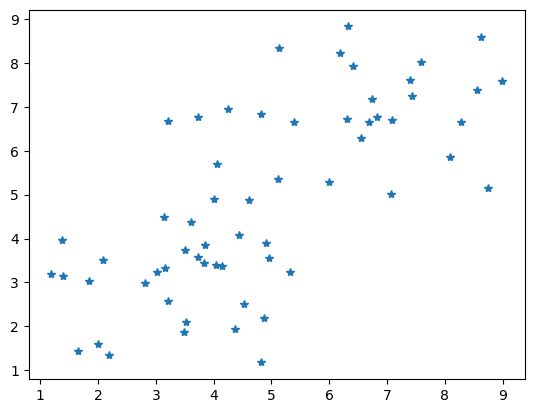

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2
 2 0 2 0 2 1 0 1 1 1 1 0 1 0 2 0 0 1 1 0 1 0 1]
[[4.57565667 6.21775171]
 [3.36698986 3.00295616]
 [7.36393253 7.07792723]]
119.93369002866375


/var/folders/gg/9f329j_x4m90bq72rxcyplv40000gn/T/ipykernel_76507/3311021203.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ok'),plt.legend(),plt.show()


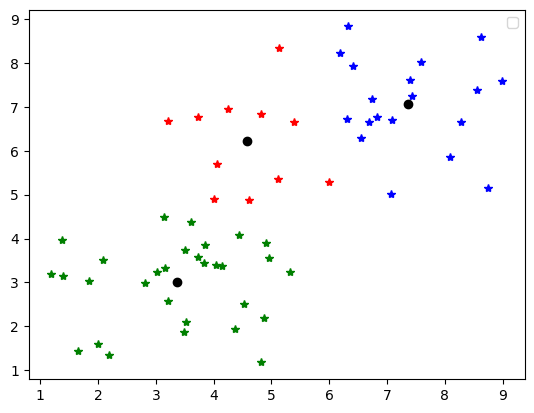

([<matplotlib.lines.Line2D at 0x149181450>],
 None)

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster,datasets
from skimage import io,color,measure
import matplotlib as mpl

plt.close('all')

######################## 1) Modul de functionare al K-means - implementarea sklearn ############
# verificare pe niste date 2D oarecare generate aleator
X1 = np.random.rand( 20 , 2 ) * 4 + 1    # 3 clase -> X1,X2,X3
X2 = np.random.rand( 20 , 2 ) * 4 + 5
X3 = np.random.rand( 20 , 2 ) * 4 + 3
# np.random.rand(m, n) -> generează un array m x n cu valori aleatoare uniform distribuite între 0 și 1.
# * 4 + 1:  -> Multiplicarea cu 4 extinde intervalul valorilor de la [0, 1] la [0, 4].
#           -> Adăugarea de 1 deplasează acest interval la [1, 5].
#           -> X1 conține puncte aleatoare în intervalul [1, 5] pentru ambele coordonate.

data = np.concatenate( (X1,X2,X3), axis = 0)
print(np.shape(data))

plt.figure(), plt.plot(data[:,0], data[:,1],'*'), plt.show()
# Plotează toate punctele din data.
# data[:, 0] selectează prima coloană (coordonatele x).
# data[:, 1] selectează a doua coloană (coordonatele y).
# Simbolul '*' specifică că punctele vor fi reprezentate prin stele.

kmeans = cluster.KMeans(n_clusters=3, random_state = None, n_init = 1).fit(data)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

dims = np.shape(data)

plt.figure()
for i in range(dims[0]):
    if(kmeans.labels_[i]==0):
        plt.plot(data[i,0],data[i,1],'r*')       
    elif(kmeans.labels_[i]==1):
        plt.plot(data[i,0],data[i,1],'g*')
    else:
        plt.plot(data[i,0],data[i,1],'b*')
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'ok'),plt.legend(),plt.show()



### Modul de functionare al K-means - segmentarea imaginilor color
In cazul imaginilor True Color, fiecare pixel este caracterizat de un vector de 3 numere - cantitatile de rosu, verde si albastru ale culorii pixelului. Cele trei componente de culoare pot fi considerate vector de trasaturi pentru pixelul respectiv.

Asadar in cele ce urmeaza vom face o segmentare a pixelilor cu ajutorul algoritmului K-means considerand ca vectori de trasaturi chiar informatiile de culoare ale acestora.

### Imagini disponibile
peppers-mic.png, cuburi-mic.jpg, boabe-piper-mic.jpg, mm-mic.jpg

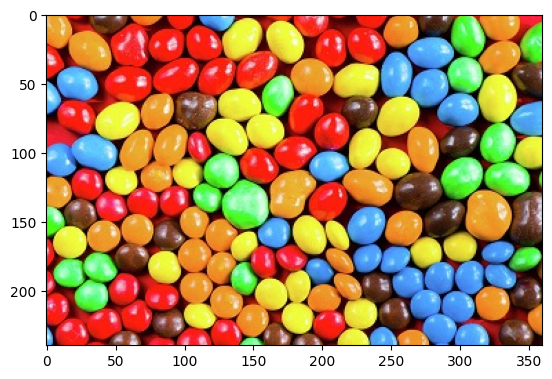

(240, 360, 3)
(86400,)
(86400, 3)
[[ 46.78983051  15.11611973  10.21153985]
 [234.24767196 189.77706726  55.94616522]
 [ 83.31711004 160.68480451 235.82114067]
 [236.74656531  42.40700188  32.0213404 ]
 [ 87.61161826 231.15228216  67.92863071]
 [235.24852768 177.59411072 160.2565371 ]
 [155.05062929 247.07322654 190.29319222]
 [123.50888681  60.24883068  34.11206735]]
[1 1 1 ... 0 0 0]


/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/si

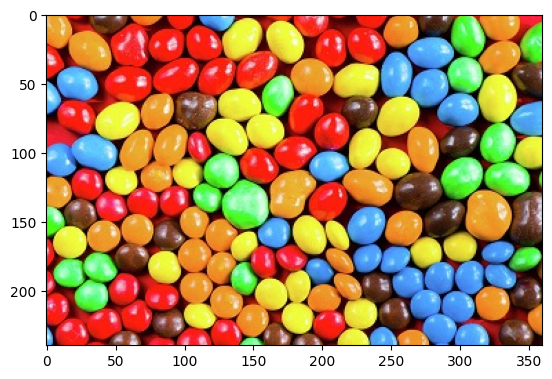

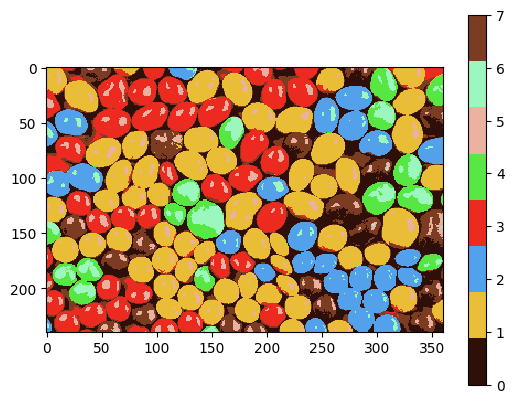

(86400,)


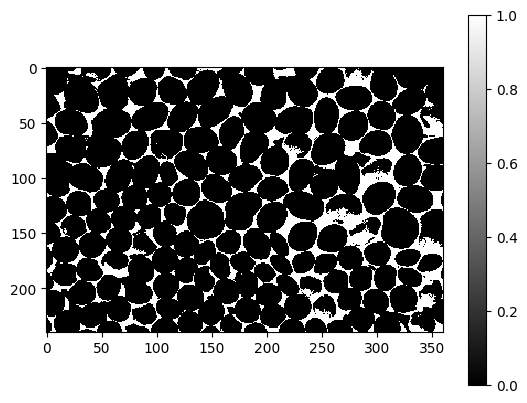

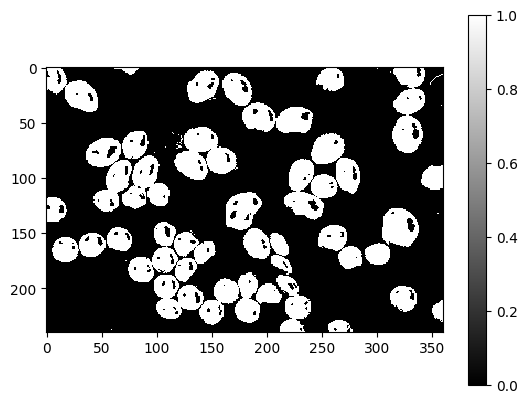

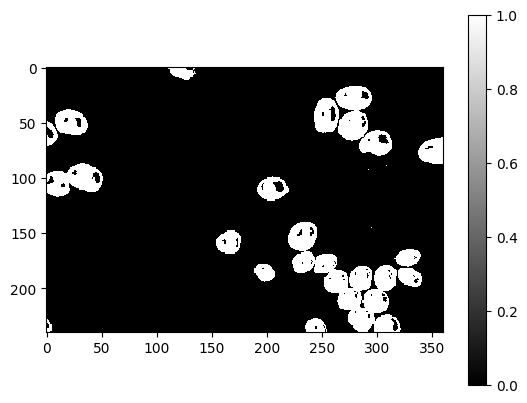

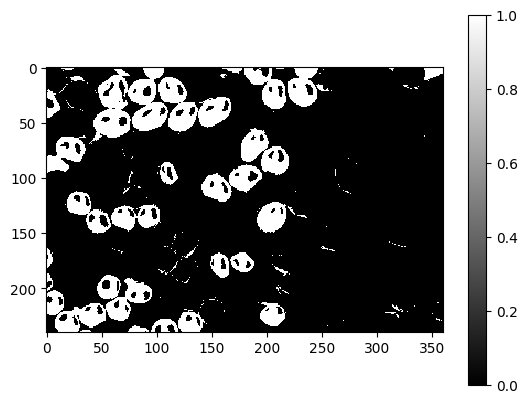

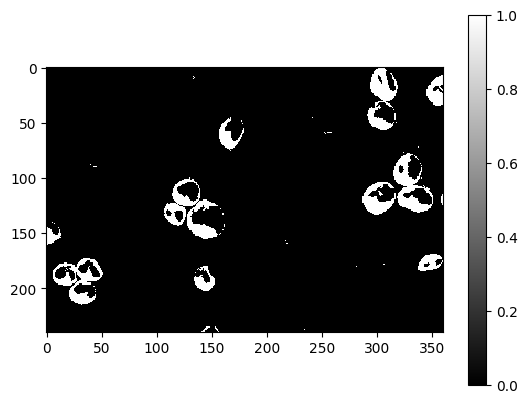

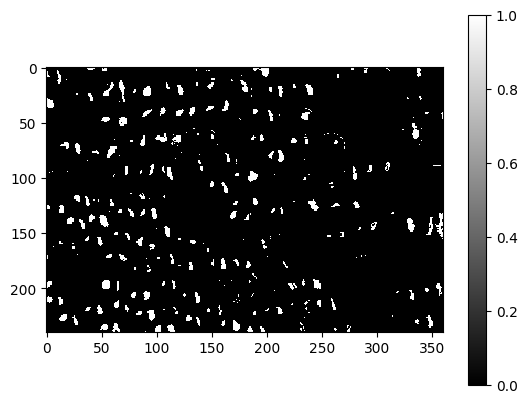

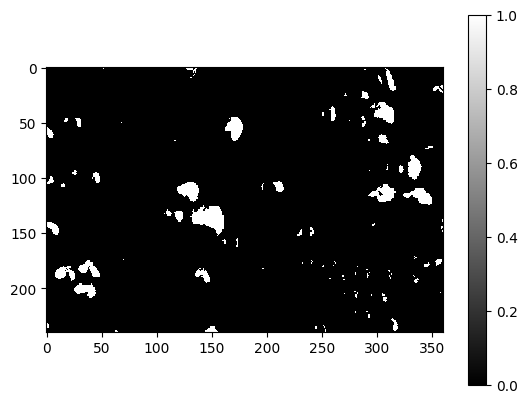

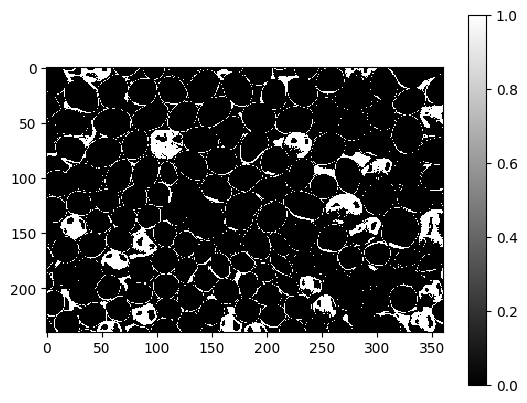

In [70]:
# citim o imagine color
#img=io.imread('dipum.jpg')
#img=io.imread('cuburi-mic.jpg')
img=io.imread('mm-mic.jpg')

#plotezi img
plt.figure(),plt.imshow(img),plt.show()

#dim imaginii
dims = np.shape(img)
print(dims)

# luam separat planurile de culoare
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]


# le vectorizam 
r=np.ndarray.flatten(R[:])
g=np.ndarray.flatten(G[:])
b=np.ndarray.flatten(B[:])

print(np.shape(r))

# ne formam setul de date
data = np.transpose(np.array([r,g,b]))
print(np.shape(data))

#nr de clase K
K = 8
kmeans = cluster.KMeans(n_clusters=K, random_state=0).fit(data)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

print(centroizi)
print(etichete)

harta=np.array(centroizi/255)
harta=mpl.colors.ListedColormap(harta)

plt.figure(), plt.imshow(img), plt.show()
plt.figure(), plt.imshow(np.reshape(etichete, (dims[0],dims[1])), cmap=harta,interpolation='none'), plt.colorbar(), plt.show()
# -> iti arata cum au fost impartite clasele

print(np.shape(etichete))

for i in range(K):
    plt.figure(),plt.imshow(np.uint8(np.reshape(etichete, (dims[0],dims[1]))==i),cmap="gray",interpolation='none'),plt.colorbar(),plt.show()
# -> sunt plotate img pt fiecare clasa


## Augmentarea nivelului de gri cu caracteristici de vecinatate

Dar daca este vorba de imagini cu niveluri de gri, asa cum am lucrat pana acum? Ce informatii am putea aduce in plus fiecarui pixel?

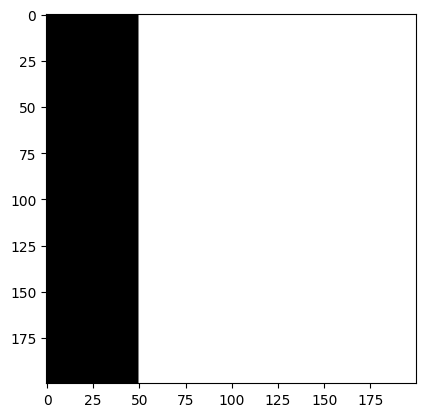

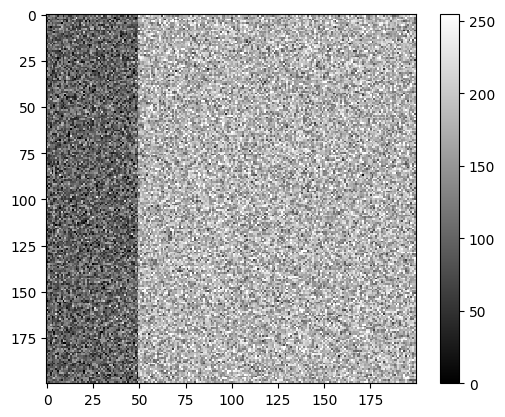

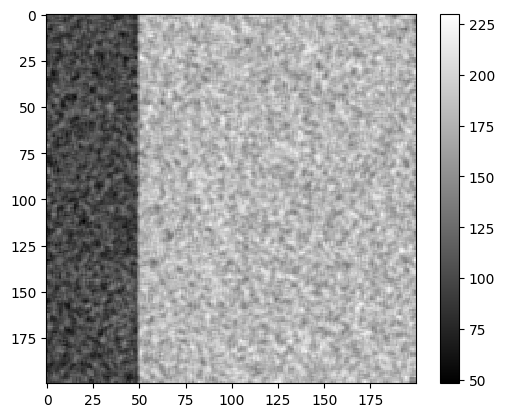

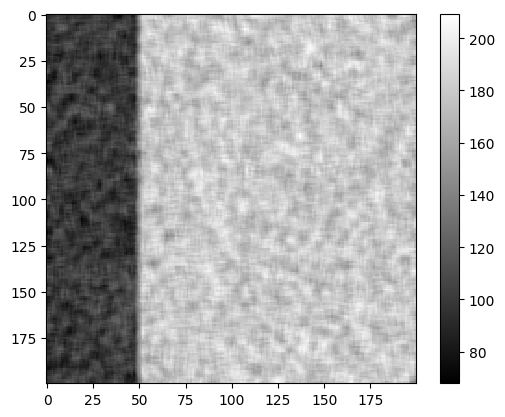

In [71]:
# -> este vorba de imagini cu niveluri de gri - aducem informatii in plus

# imi generez o imagine simpla pe care sa lucrez
Y = 100*np.ones([200,200])   # -> luminanta=100
Y[:, 50:200] = 180
L = 256

plt.figure(),plt.imshow(Y,cmap="gray"),plt.show()

# adaug zgomot imaginii ideale de luminanta
dims = np.shape(Y)
Lines = dims[0]
Columns = dims[1]

N=np.random.normal(0,40,[Lines,Columns])
Yzg = Y+N

#normalizarea pixelilor
# -> Aceasta este o formă de clipping pentru a preveni 
#    valorile de intensitate să fie în afara intervalului permis 
#    pentru imagini grayscale.
for i in range(0,Lines):
    for j in range(0, Columns):
        if (Yzg[i,j]>L-1):
            Yzg[i,j]=L-1
        else:
            if (Yzg[i,j]<0):
                Yzg[i,j]=0
                
# Yzg este imaginea pe care vreau sa o segmentez
Yzg = np.uint8(Yzg)

# imi calculez imaginea filtrata cu filtre de medie aritmetica centrate de dimensiune 3x3 si respectiv 5x5
from scipy import signal
Ymed = signal.convolve2d(Yzg,np.ones([3,3])/9,boundary='symm', mode='same')
Ymedmed = signal.convolve2d(Yzg,np.ones([5,5])/25,boundary='symm', mode='same')

plt.figure(), plt.imshow(Yzg, cmap = "gray", interpolation='none'), plt.colorbar(), plt.show()
plt.figure(), plt.imshow(Ymed, cmap = "gray", interpolation='none'), plt.colorbar(), plt.show()
plt.figure(), plt.imshow(Ymedmed, cmap = "gray", interpolation='none'), plt.colorbar(), plt.show()


# Pentru un pixel avem acum:
# (1) nivelul de gri initial, 
# (2) nivelul de gri din imaginea filtrata cu medie aritmetica pe fereastra 3x3 
# (3) nivelul de gri din imaginea filtrata cu medie aritmetica pe fereastra 5x5
r = np.ndarray.flatten(Yzg[:])
g = np.ndarray.flatten(Ymed[:])
b = np.ndarray.flatten(Ymedmed[:])

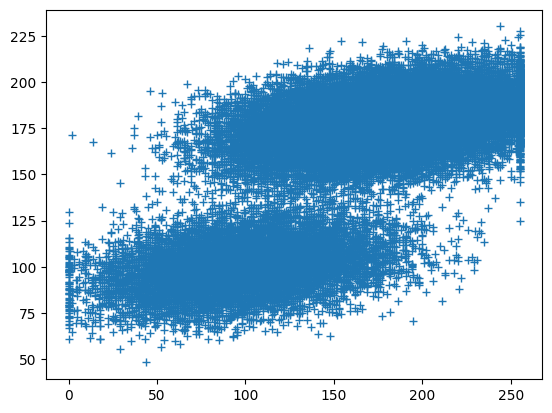

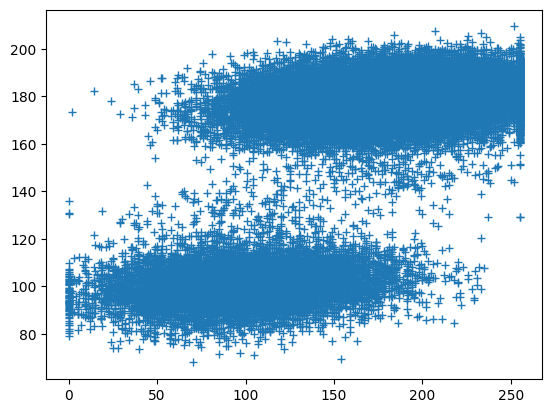

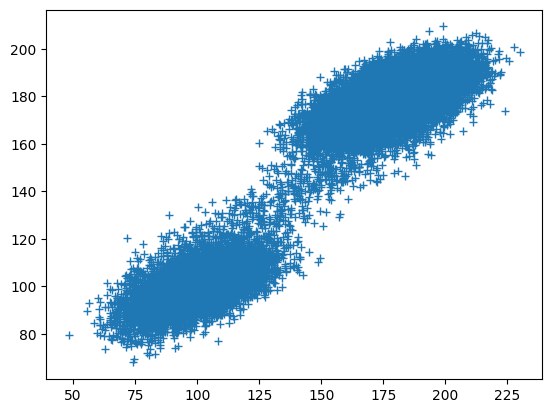

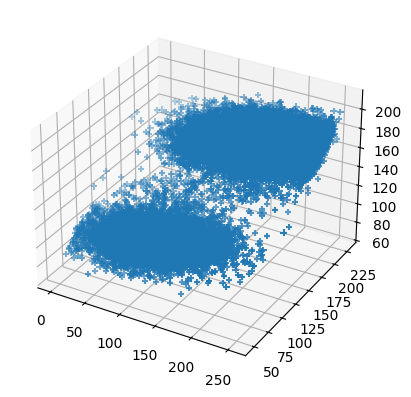

In [72]:
# putem vizualiza norii de puncte 2D
plt.figure(),plt.plot(r,g,'+'),plt.show()
plt.figure(),plt.plot(r,b,'+'),plt.show()
plt.figure(),plt.plot(g,b,'+'),plt.show()

# sau direct norii de puncte 3D
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(r, g, b, marker='+')
plt.show()

/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/si

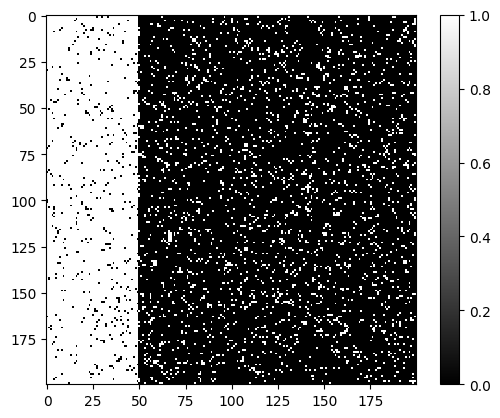

/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/si

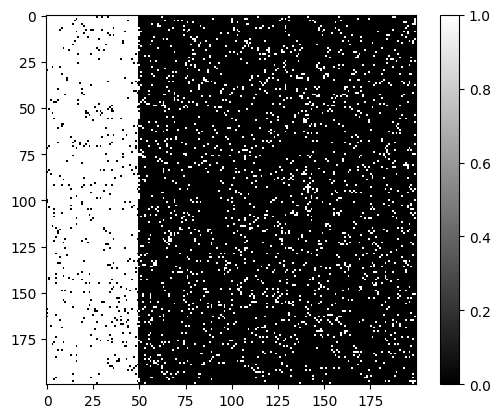

/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/si

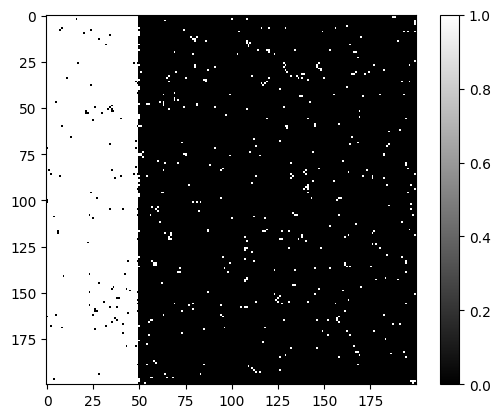

(<Figure size 640x480 with 2 Axes>,
 None)

In [73]:
##### aplicam KMeans pe 2D si pe 3D

# pentru R si G
data = np.transpose(np.array([r,g]))
#print(np.shape(data))

kmeans = cluster.KMeans(n_clusters = 2, random_state = 0).fit(data)
labels = kmeans.labels_
kmeans.cluster_centers_

plt.figure(),plt.imshow(np.reshape(labels, (200,200)),cmap="gray",interpolation='none'),plt.colorbar(),plt.show()


# pentru R si B
data = np.transpose(np.array([r,b]))
#print(np.shape(data))

K = 2
kmeans = cluster.KMeans(n_clusters = K, random_state = 0).fit(data)
labels = kmeans.labels_
kmeans.cluster_centers_

plt.figure(),plt.imshow(np.reshape(labels, (200,200)),cmap="gray",interpolation='none'),plt.colorbar(),plt.show()


# pentru R G si B
data = np.transpose(np.array([r,g,b]))
#print(np.shape(data))

kmeans = cluster.KMeans(n_clusters = 2, random_state = 0).fit(data)
labels = kmeans.labels_
kmeans.cluster_centers_

plt.figure(),plt.imshow(np.reshape(labels, (200,200)),cmap="gray",interpolation='none'),plt.colorbar(),plt.show()


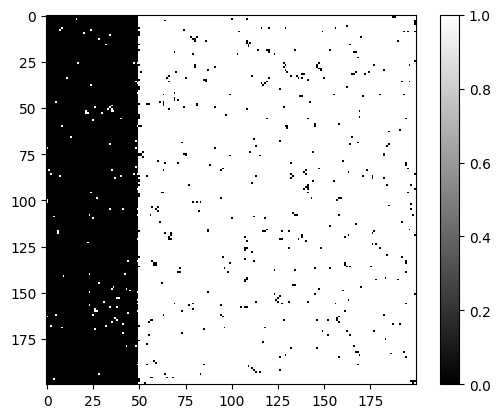

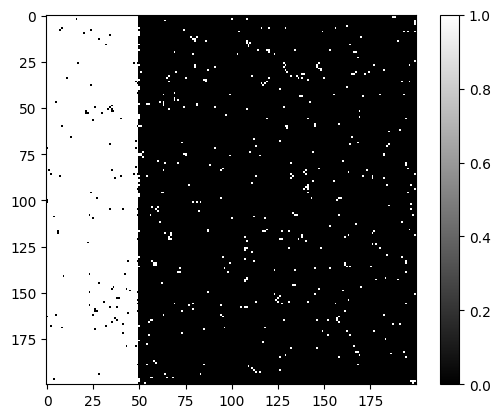

In [74]:
for i in range(K):
    plt.figure(),plt.imshow(np.reshape(labels, (200,200))==i,cmap="gray",interpolation='none'),plt.colorbar(),plt.show()


TO DO (5 minute): incercati algoritmul K-Means pentru diverse imagini color. Variati numarul de clase.

## Algoritmul de clusterizare Fuzzy C-means (Fuzzy K-means, Fuzzy-ISODATA)

Metoda K-means considera ca un pixel apartinei unei singure clase si numai uneia. Ce se intampla insa daca consideram ca fiecarui pixel i se asociaza un grad de apartenenta la fiecare clasa? Cum se schimba algoritmul anterior?

Daca notam gradul de apartenenta al pixelului $x_i$ la clasa $j$ cu $\mu_{i,j}$ atunci:

$ \mu_{i,j} \in [0,1]$
si
$ \sum^K_{j=1} {\mu_{i,j} = 1}$

Functia obiectiv ce vrem sa fie minimizata este:

$ J = \sum^K_{j=1}{\sum^N_{i=1} {\mu_{i,j} * || x^{(j)}_i - c_j ||^2  }} $

unde $ || x^{(j)}_i - c_j ||^2 $ este distanta dintre punctul $i$ asignat clasei $j$ si centroidul acelei clasei, $c_j$. 

Algoritmul la care se ajunge, este un algoritm iterativ, astfel:

Pasul 1: Se intializeaza centroizii, $c_j$ (sau gradele de apartenenta). 

Pasul 2: Se calculeaza distantele de la fiecare punct la fiecare centroid si se alege gradul de apartenenta invers proportional cu distanta.

Pasul 3: Se recalculeaza centroizii ca fiind media aritmetica a punctelor asignate fiecarei clase ponderata cu gradele de apartenenta.

Pasul 4: Se repeta pasii 2 si 3 pana cand se ajunge la convergenta.

Si in scikit-fuzzy exista implementat deja algoritmul FCM. (evident pentru a-l putea folosi trebuie sa aveti instalat scikit-fuzzy -> pip install scikit-fuzzy )

\textbf{Atentie: datele trebuie sa fie sub forma [numar de puncte, numar de trasaturi] (asadar transpuse fata de ceea ce cerea implementarea KMeans)}

(60, 2)


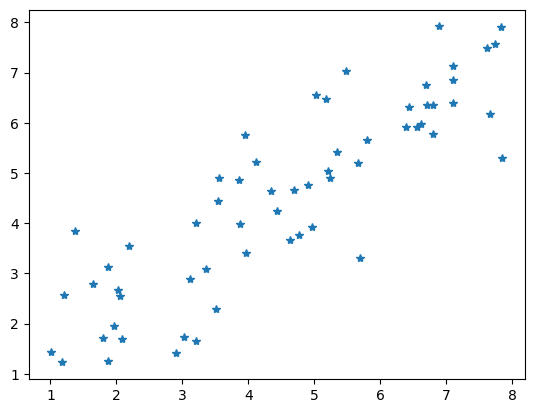

[[2.11370738 2.22456145]
 [6.8317986  6.55070858]
 [4.46040745 4.52657011]]
[[0.89626989 0.71395019 0.83513332 0.94202817 0.87998287 0.89020312
  0.89471272 0.87899067 0.92994734 0.97435033 0.97410266 0.92226492
  0.55789727 0.99098779 0.71075593 0.72483089 0.9697502  0.74515984
  0.09051904 0.98581222 0.0231349  0.01658641 0.0014524  0.04475238
  0.01301989 0.04818923 0.0101916  0.00812359 0.00570835 0.00339122
  0.02765959 0.01642311 0.01536367 0.06420915 0.03718498 0.00222335
  0.00107938 0.00134729 0.0297104  0.05765897 0.00885164 0.01681687
  0.07803641 0.04092947 0.08507658 0.05257471 0.0386759  0.00263827
  0.10474193 0.14735621 0.08826493 0.27940356 0.04403577 0.03682461
  0.00563005 0.04997443 0.04370633 0.22570677 0.06445585 0.04956079]
 [0.02728486 0.04819487 0.03443359 0.0122003  0.02482544 0.02114613
  0.0278319  0.02717684 0.01739121 0.00585689 0.00512231 0.01809646
  0.0530654  0.00200459 0.06138215 0.03886153 0.00711545 0.04250158
  0.03646876 0.00283648 0.90515697 0.92

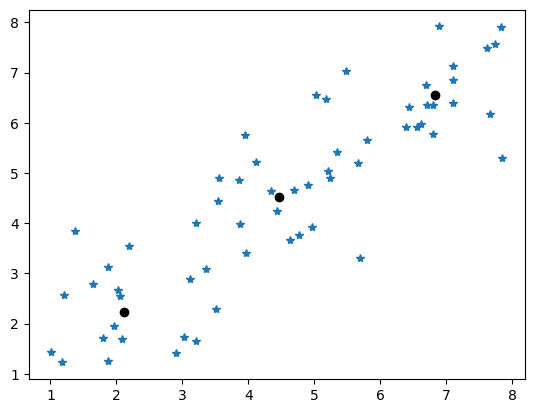

In [75]:
import skfuzzy as fuzz

#plt.close('all')

X1 = np.random.rand( 20 , 2 ) * 3 + 1
X2 = np.random.rand( 20 , 2 ) * 3 + 5
X3 = np.random.rand( 20 , 2 ) * 3 + 3
data = np.concatenate( (X1,X2,X3), axis = 0)
print(np.shape(data))

plt.figure(), plt.plot(data[:,0],data[:,1],'*'), plt.show()


centroizi, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(np.transpose(data), 3, m = 2, error=0.005, maxiter = 1000, init=None)
# -> 3 este nr de clase
# u -> gradul de apartenenta


print(centroizi)
print(u)
print(np.shape(u))

plt.figure(), plt.plot(data[:,0], data[:,1],'*'), 
plt.plot(centroizi[:,0],centroizi[:,1],'ok')
plt.show()

In [76]:
print(np.shape(u))

#print(np.sum(u))
#print(np.sum(u,axis=0))

print(u[:,4])

(3, 60)
[0.87998287 0.02482544 0.09519169]


Pentru segmentare, gradele de apartenenta trebuie defuzificate - transformate in valori binare. Aceasta se face de obicei prin defuzificarea pe baza maximului gradului de apartenenta:

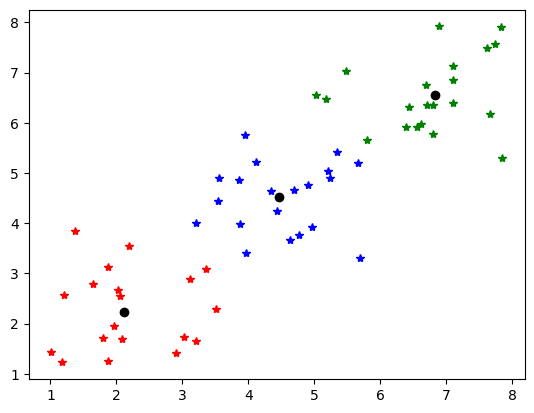

In [77]:
dims = np.shape(data)

plt.figure()
for i in range(dims[0]):
    if(np.argmax(u[:,i])==0):
        plt.plot(data[i,0], data[i,1],'r*')       
    elif(np.argmax(u[:,i])==1):
        plt.plot(data[i,0], data[i,1],'g*')
    else:
        plt.plot(data[i,0], data[i,1],'b*')
plt.plot(centroizi[:,0],centroizi[:,1],'ok')
plt.show()

### Modul de functionare al FCM - segmentarea imaginilor color


### Imagini disponibile
peppers-mic.png, cuburi-mic.jpg, boabe-piper-mic.jpg, mm-mic.jpg

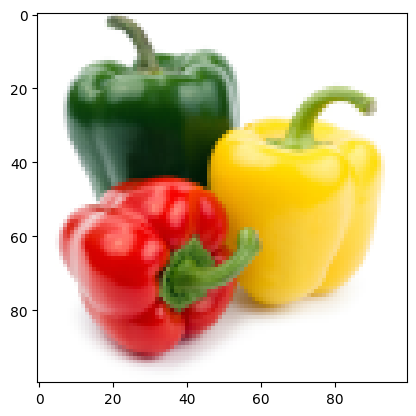

(100, 100, 3)
(10000, 3)
[[253.41422398 252.69769707 251.66417656]
 [246.3453494  206.34229158  60.76710192]
 [132.39910356 147.51501317  97.60853182]
 [ 30.43248768  64.10333076  21.17171073]
 [213.7756857   44.66561267  35.16389171]]


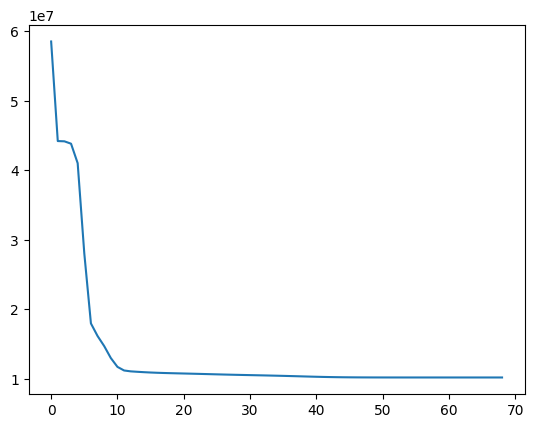

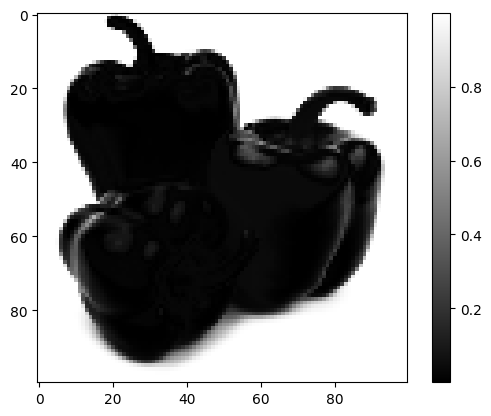

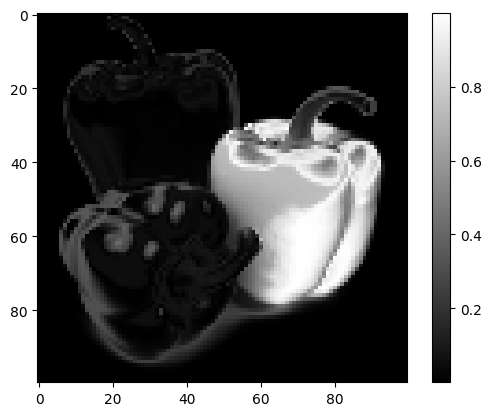

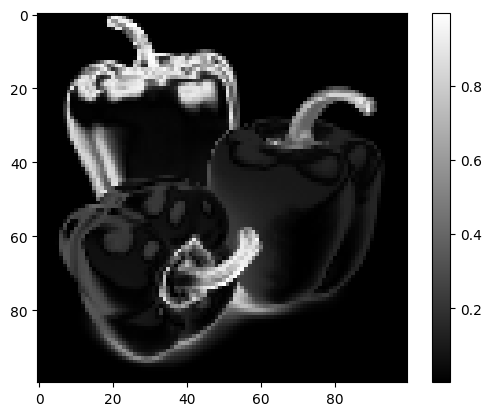

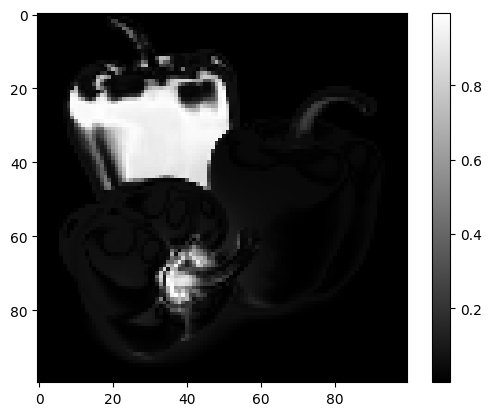

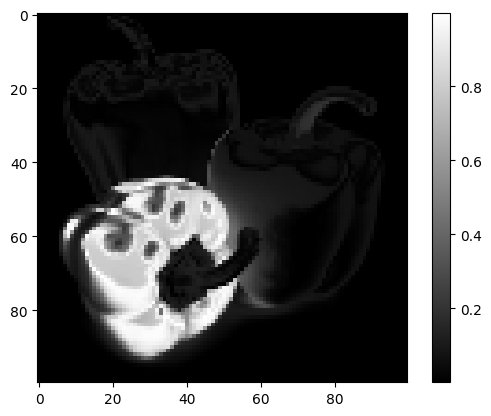

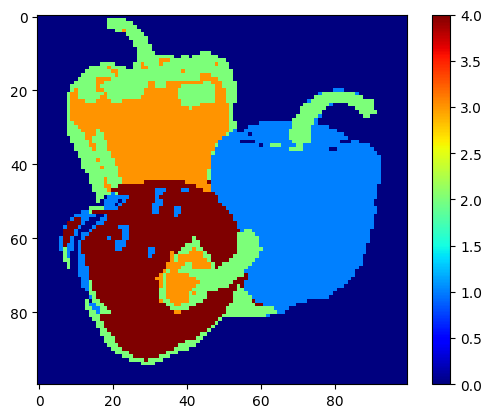

(<Figure size 640x480 with 2 Axes>,
 None)

In [78]:
import numpy as np
from skimage import io, measure
import matplotlib.pyplot as plt
import skfuzzy as fuzz

img = io.imread('peppers-mic.png')
plt.figure(), plt.imshow(img), plt.show()
dims = np.shape(img)
print(dims)
H = dims[0]
W = dims[1]

R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
r = np.ndarray.flatten(R[:])
g = np.ndarray.flatten(G[:])
b = np.ndarray.flatten(B[:])
data = np.transpose(np.array([r,g,b]))
print(np.shape(data))

K = 5

centroizi, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        np.transpose(data), K, m = 2, error=0.005, maxiter = 1000, init=None)

print(centroizi)

# vizualizarea functiei obiectiv
plt.figure(), plt.plot(jm), plt.show()

# vizualizarea gradelor de apartenenta la fiecare clasa
for i in range(K):
    plt.figure(),plt.imshow(np.reshape(u[i,:], (H,W)),cmap="gray",interpolation='none'),plt.colorbar(),plt.show()

# defuzificare prin considerarea maximului
plt.figure(),plt.imshow(np.reshape(np.argmax(u, axis = 0), (H,W)),cmap="jet",interpolation='none'),plt.colorbar(),plt.show()


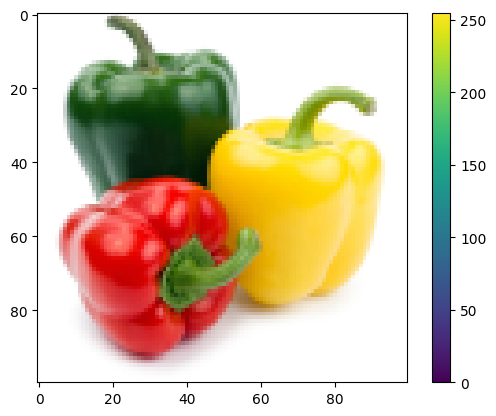

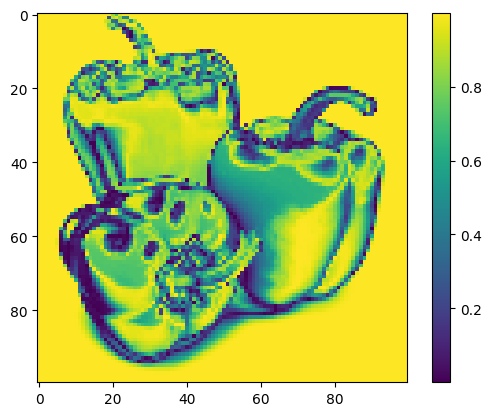

(<Figure size 640x480 with 2 Axes>,
 None)

In [79]:
U=np.sort(u,axis=0)
dif=U[K-1,:]-U[K-2,:]
plt.figure(),plt.imshow(img),plt.colorbar(),plt.show()
plt.figure(),plt.imshow(np.reshape(dif,(H,W))),plt.colorbar(),plt.show()


### Rularea algoritmului FCM cu initializare pe prototipuri

[[246.34366181 206.34660325  60.79850151]
 [213.78309288  44.67702155  35.17330661]
 [132.30037413 147.46136134  97.53678841]
 [253.41361607 252.69688445 251.66330667]
 [ 30.40985713  64.07721075  21.15398203]]


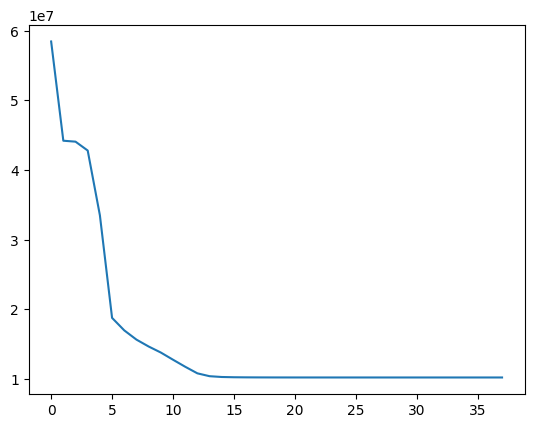

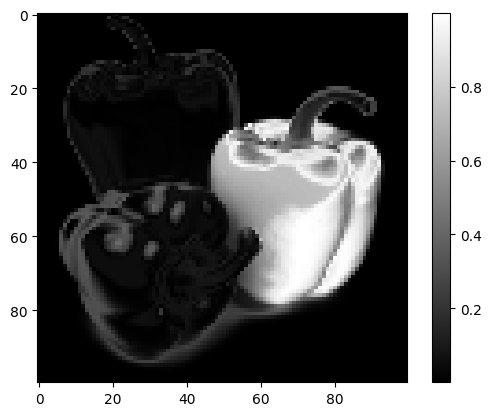

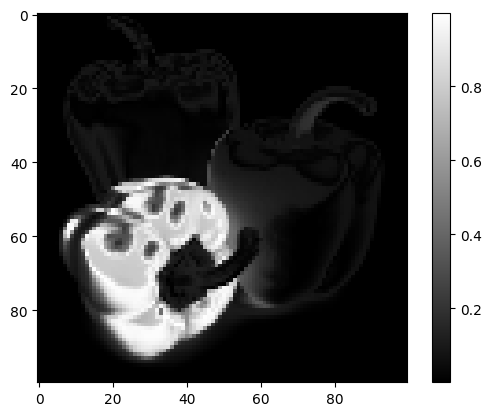

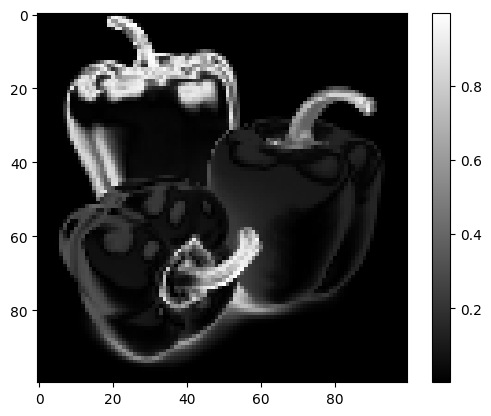

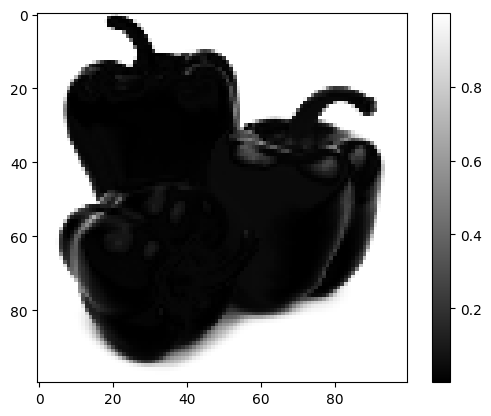

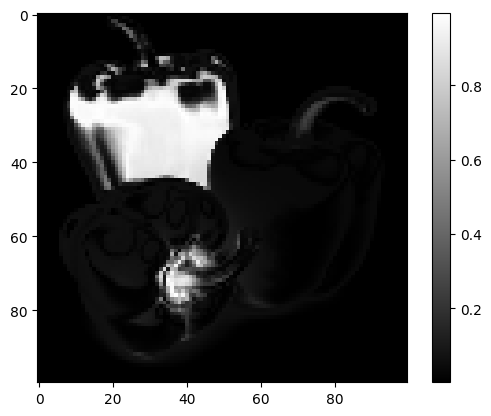

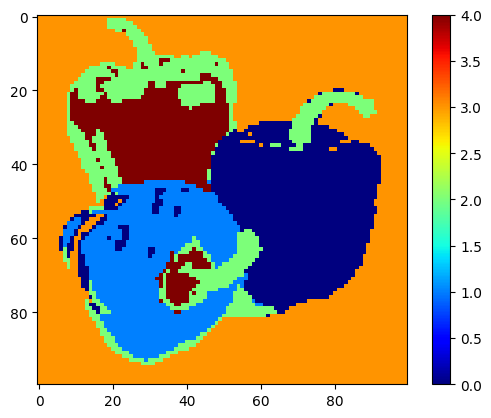

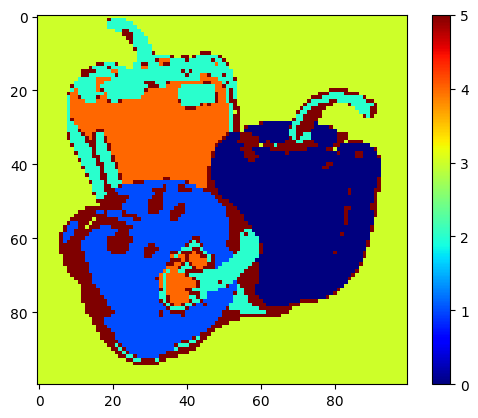

(<Figure size 640x480 with 2 Axes>,
 None)

In [80]:
centroizi, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(np.transpose(data), K, m = 2, error=0.005, maxiter = 1000, init=None)
# Apelarea algoritmului fuzzy c-means: fuzz.cluster.cmeans() efectuează clustering-ul, returnând:
# -> centroizi: coordonatele centrelor clusterelor.
# -> u: matricea gradelor de apartenență pentru fiecare punct.
# -> u0: matricea inițială a gradelor de apartenență.
# -> d: distanțele la centroizi.
# -> jm: funcția obiectiv în fiecare iterație.
# -> p: numărul de iterații.
# -> fpc: coeficientul de performanță fuzzy.
print(centroizi)

# vizualizarea functiei obiectiv
plt.figure(), plt.plot(jm), plt.show()

# vizualizarea gradelor de apartenenta la fiecare clasa
for i in range(K):
    plt.figure(),plt.imshow(np.reshape(u[i,:], (H,W)),cmap="gray",interpolation='none'),plt.colorbar(),plt.show()

# defuzificare prin considerarea maximului
# -> Defuzificarea este procesul de convertire a unui set de valori fuzzy 
#    într-o valoare crisp (precisă), care poate fi utilizată pentru a lua 
#    decizii sau pentru a controla un sistem.
plt.figure(),plt.imshow(np.reshape(np.argmax(u, axis = 0), (H,W)),cmap="jet",interpolation='none'),plt.colorbar(),plt.show()

# np.argmax(u, axis = 0) determină clusterul cu cel mai mare grad de 
# apartenență pentru fiecare pixel. plt.imshow() afișează rezultatul 
# defuzificat.

#marcam pixelii inconsistenti cu ultima eticheta
et=np.reshape(np.argmax(u, axis = 0), (H,W))
maxim=np.reshape(np.max(u, axis = 0), (H,W))
et[maxim<0.5]=K

# Marcare a pixelilor inconsistenți:
# -> et: etichetele pixelilor după defuzificare.
# -> maxim: valoarea maximă a gradului de apartenență pentru fiecare pixel.
# -> et[maxim < 0.5] = K marchează pixelii inconsistenți (cei cu grad maxim 
# de apartenență sub 0.5) cu o etichetă specială K.
# -> plt.imshow(et) afișează imaginea finală cu pixelii inconsistenti marcați.

plt.figure(),plt.imshow(et,cmap="jet",interpolation='none'),plt.colorbar(),plt.show()


# Etichetarea imaginilor binare

Imaginile binare sunt definite de doar doua valori posibile pe care le pot lua punctele acestora: 0 si 1. In mod conventional se considera ca valoarea 1 corespunde punctelor-obiect (puncte de interes) din imagine, in timp ce valoarea 0 defineste punctele fundalului (sau fondului imaginii). Etichetarea imaginilor binare are ca obiectiv identificarea si separarea obiectelor individuale din imagine, deci marcarea tuturor punctelor ce apartin unui anumit obiect cu o eticheta unica, diferita de etichetele celorlalte obiecte prezente. Fiecare obiect individual este o componenta conexa distincta.

Esenta algoritmilor de etichetare (segmentare in suportul imaginii) este identificarea pixelilor ce formeaza un acelasi obiect prin detectia adiacentelor dintre acestia si asocierea unei etichete unice tuturor punctelor aceluiasi obiect. Adiacenta (vecinatatea) este deci conceptul fundamental pe baza caruia sunt identificate obiectele. Adiacenta este determinata de tipul de conexitate adoptat; in cazul imaginilor esantionate pe o retea patrata sunt uzuale modelele de conexitate de tip  𝑉4 sau de tip  𝑉8. Pentru o conexitate de tip  𝑉4 fiecare pixel al imaginii are patru vecini (ce formeaza ceea ce se numeste vecinatatea imediata a punctului). Vecinatatea imediata a punctului de coordonate  (𝑙,𝑐)
  este multimea  𝑉4(𝑙,𝑐)={(𝑙−1,𝑐),(𝑙+1,𝑐),(𝑙,𝑐−1),(𝑙,𝑐+1)}. Pentru o conexitate de tip  𝑉8 fiecare pixel al imaginii are opt vecini (ce formeaza ceea ce se numeste vecinatatea extinsa a punctului). Vecinatatea extinsa a punctului de coordonate  (𝑙,𝑐) este multimea  𝑉8(𝑙,𝑐)=𝑉4(𝑙,𝑐)⋃{(𝑙−1,𝑐−1),(𝑙+1,𝑐−1),(𝑙−1,𝑐+1),(𝑙+1,𝑐+1)}
 

Un drum intre doua puncte ale imaginii este o secventa ordonata de puncte ale imaginii, vecine doua cate doua (relativ la un anumit tip de conexitate,  𝑉4 sau  𝑉8), care are drept capete punctele considerate. Un obiect este o componenta conexa, iar pentru o componenta conexa, intre orice doua puncte ce ii apartin exista cel putin un drum inclus in componenta respectiva.

Fiecare componenta conexa din imaginea binara are dupa etichetare pentru toti pixelii o aceeasi valoare. Atentie la vizualizarea imaginii etichetate la folosirea tabelei de culoare si la afisarea imaginii fara interpolare. Verificarea numarului de componente va arata ca fundalul RAMANE cu eticheta 0 (ca si valorile sale initiale), iar etichetele obiectelor sunt de la 1 la numarul maxim de etichete returnat de functia de etichetare, fara etichete neutilizate. Putem folosi histograma imaginii etichetate pentru a vedea numarul de pixeli pe fiecare eticheta (deci in fiecare obiect).

### Ce vom coda
incarcare imagine de test, thresholding pentru binarizare, utilizarea functiei label din modulul skimage.measure

(200, 200)


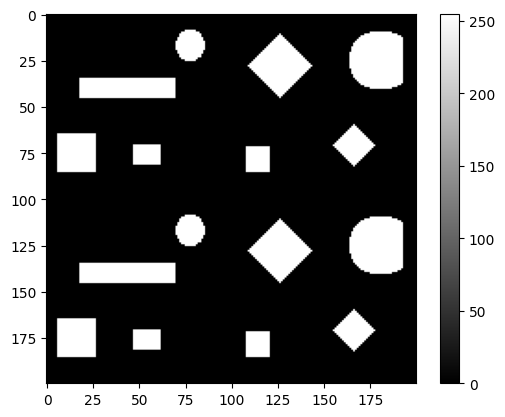

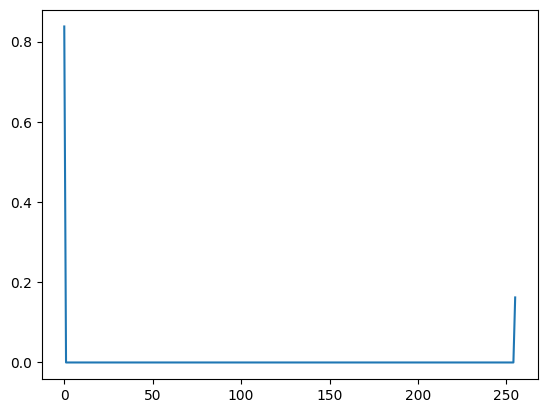

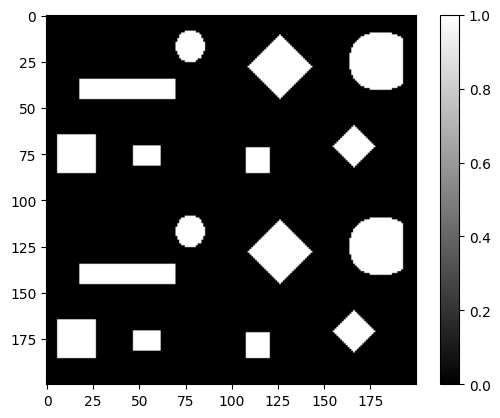

16


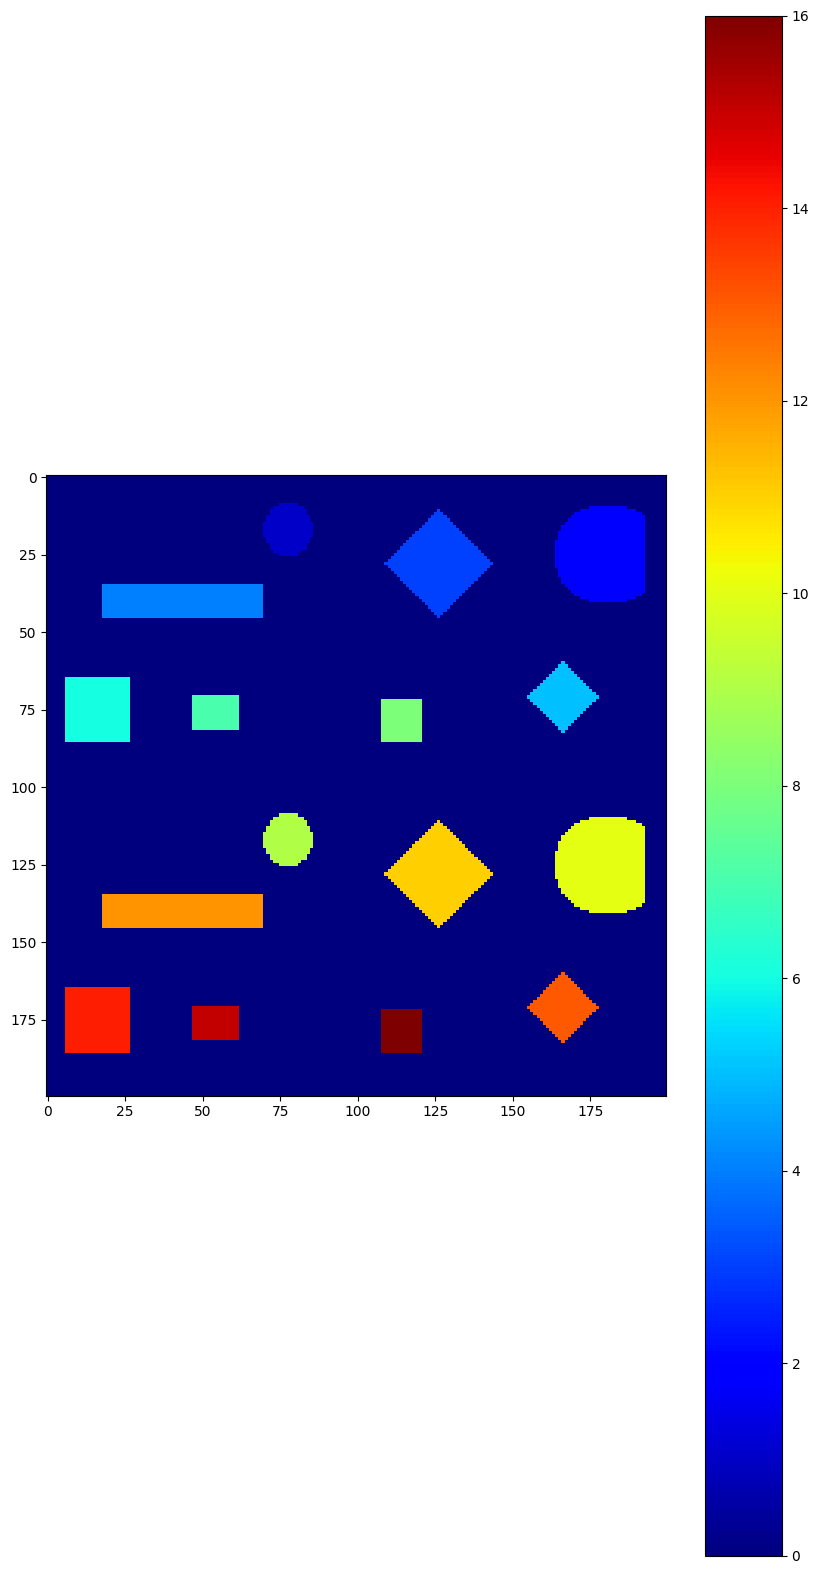

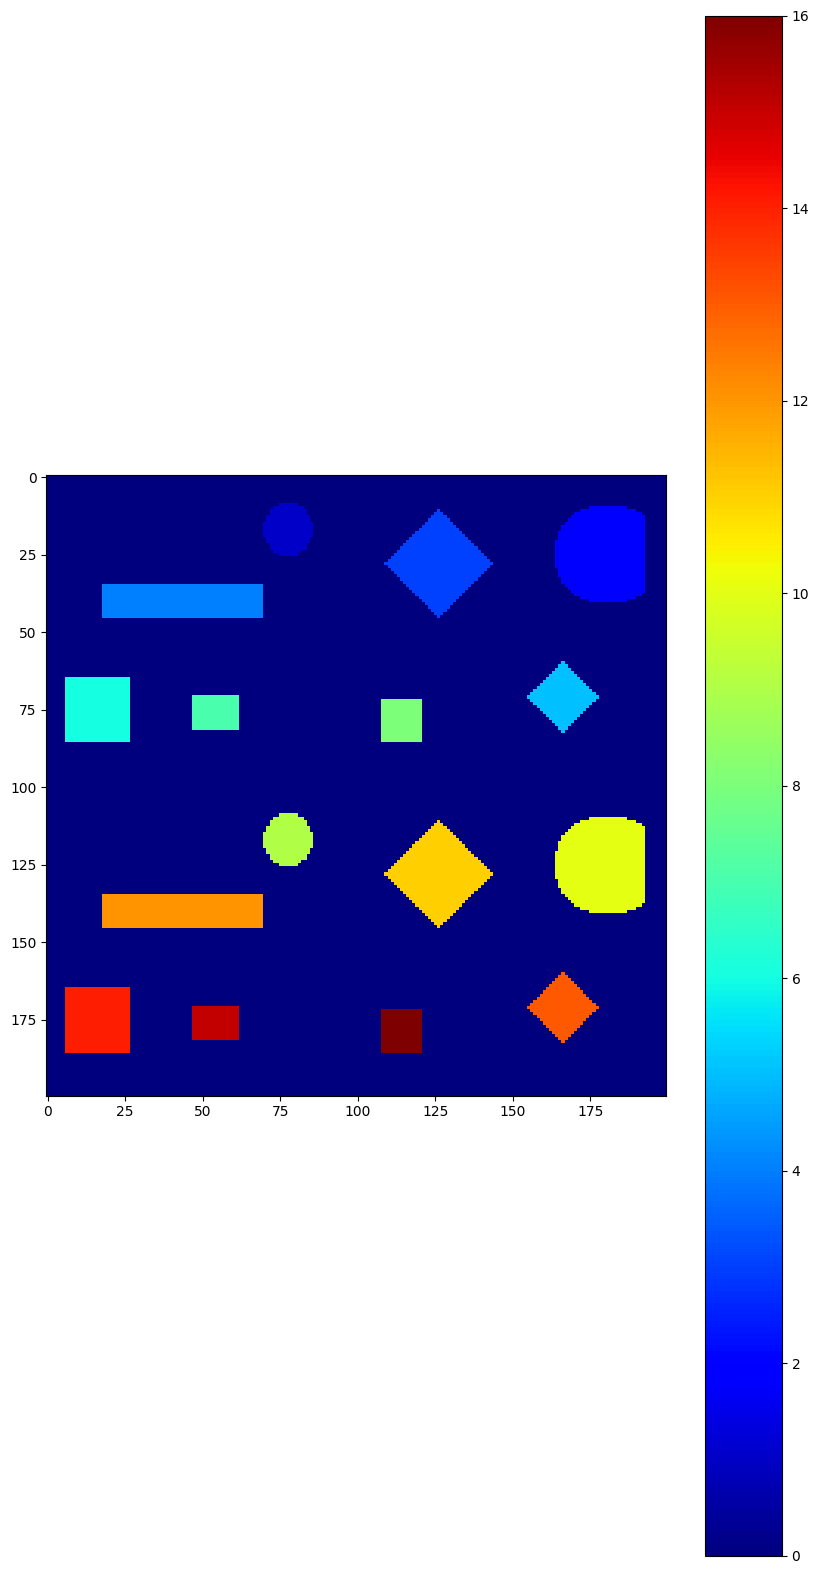

(176.0, 54.0)
165.0
1.5707963267948966
48.0
[0.17373737 0.0027589  0.         0.         0.         0.
 0.        ]
[[251.69053398 222.90776699  99.87985437]
 [ 28.50235294  62.40470588  19.66470588]
 [253.41401548 252.90907137 252.17046432]
 [214.5470233   41.97756687  36.10526316]
 [103.9925187  134.12094763  85.37780549]
 [168.97737557 144.28959276  25.8280543 ]
 [208.97982709 164.86023055 148.9221902 ]
 [244.61779449 195.92606516  19.28320802]]
[2 2 2 ... 2 2 2]


/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/cristimiloiu/Desktop/workspace/work/.venv/lib/python3.13/si

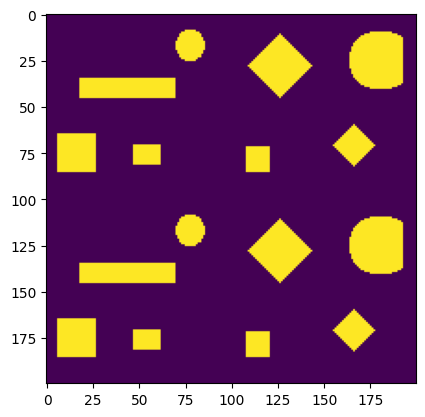

(<Figure size 640x480 with 1 Axes>,
 None)

In [81]:
#img=io.imread('biscuiti.jpg')
Y=io.imread('test-obiecte.bmp')
dims=np.shape(Y)
print(dims)

H=dims[0]
W=dims[1]
plt.figure(),plt.imshow(Y,cmap="gray"),plt.colorbar(),plt.show()

h=np.histogram(Y,bins=256,range=(0,256),density=True)
plt.figure(),plt.plot(h[0]),plt.show()

# binarizare img
BW=np.uint8(Y>100)
plt.figure(),plt.imshow(BW,cmap="gray"),plt.colorbar(),plt.show()

[LabelImage, nums]=measure.label(BW,return_num='True')
print(nums)
plt.figure(figsize=(10,20)),plt.imshow(LabelImage,cmap="jet"),plt.colorbar(),plt.show()
plt.figure(figsize=(10,20)),plt.imshow(LabelImage,cmap="jet",interpolation='none'),plt.colorbar(),plt.show()

# print(nums)
# print(np.min(LabelImage))
# print(np.max(LabelImage))

# hL=np.zeros(nums+1)
# for i in range (0,H):
#     for j in range (0,W):
#         hL[LabelImage[i,j]]+=1
        
# plt.figure(),plt.plot(hL),plt.show()

# plt.figure(),plt.plot(hL[1:nums]),plt.show()
# print(hL[0:nums])

# componenta_extrasa=41
# COMP=np.uint8(LabelImage==componenta_extrasa)
# plt.figure(),plt.imshow(COMP,cmap="gray"),plt.colorbar(),plt.show()

ALLPROPS=measure.regionprops(LabelImage)
#indexul obiectelor din imagine pentru structura de proprietati este  ETICHETA-1
dummy=ALLPROPS[14]
print(dummy.centroid)
print(dummy.area)
print(dummy.orientation)
print(dummy.perimeter)
print(dummy.moments_hu)

arie=np.zeros((nums,1))
for i in range(nums):
    arie[i]=ALLPROPS[i].area
    
    
    
h,w=np.shape(LabelImage)
new_img=np.zeros([h,w])

dims = np.shape(Y)

K = 8
kmeans = cluster.KMeans(n_clusters=K, random_state=0).fit(data)
etichete = kmeans.labels_
centroizi = kmeans.cluster_centers_

print(centroizi)
print(etichete)

# harta=np.array(centroizi/255)
# harta=mpl.colors.ListedColormap(harta)

# plt.figure(), plt.imshow(Y), plt.show()
#plt.figure("cauta"), plt.imshow(np.reshape(etichete, (dims[0],dims[1])), cmap=harta,interpolation='none'), plt.colorbar(), plt.show()

# print(np.shape(etichete))

# for i in range(K):
#     plt.figure(),plt.imshow(np.uint8(np.reshape(etichete, (dims[0],dims[1]))==i),cmap="gray",interpolation='none'),plt.colorbar(),plt.show()

for i in range (nums):
    new_img[LabelImage==i+1]=etichete[i]+1
    
    
plt.figure(), plt.imshow(new_img), plt.show()